# Homework 4

## Q1.1 Solution

First we solve find the first and second derivatives of $f(x)$:

\begin{aligned}
&f(x)=e^{x}-x \\
&f^{\prime}(x)=e^{x}-1 \\
&f^{\prime \prime}(x)=e^{x} \\
&x^{0}=-1
\end{aligned}

Then, we have $x^1$ as per Newton's method definition:

\begin{aligned}
&x^1=x^{0}-\frac{f^{\prime}\left(x^{0}\right)}{f^{\prime \prime}\left(x^{0}\right)} \\
&x^1=x^0-\frac{e^{x^0}-1}{e^{x^0}} \\
&x^1=x^0-1+\frac{1}{e^{x^0}} \\
&x^1=-2+\frac{1}{e^{-1}} \\
&x^1=-2+e \\
&x^1=0.718
\end{aligned}

Finally, let's find $x^k$ until we reach a solution  where $|f'(x^k)|<10^{-5}$:

\begin{aligned}
&x^{2}=0,718-1+\frac{1}{e^{0.310}}=0,206 \\
&x^{3}=0,206-1+\frac{1}{e^{0,206}}=0.02 \\
&x^{4}=0,02-1+\frac{1}{e^{0,02}}=1,99 \times 10^{-4} \\
&x^{5}=1,97 \times 10^{-8}
\end{aligned}

## Q1.2 Solution

We need to find the equivalence of the linear equation $k(x-a)+b=0$ to Newton's method.
Arranging we have:

\begin{array}{r}
k(x-a)+b=0 \\
x-a=-\frac{b}{k} \\
x=a-\frac{b}{k} \\
x^1=x^{0}-\frac{f^{\prime}(x)}{f^{\prime \prime}(x)}
\end{array}

Which means:

\begin{array}{l}
a=x^0 \\
b=f^{\prime}(x) \\
k=f^{\prime \prime}(x)
\end{array}

Using this equivalence, we can derive the linear equations that represent the Newton's
linear iterations:

\begin{array}{l}
y^{k+1} = e^{x^k}(x-x^k)+e^{x^k}-1 \\
\\
y^1 = e^{-1}(x+1)+e^{-1}-1 \\
y^2 = e^{0.718}(x-0.718)+e^{0.718}-1 \\
y^3 = e^{0.206}(x-0.206)+e^{0.206}-1
\end{array}

Graphically we have:

In [173]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import numpy as np
from IPython.display import Markdown as md


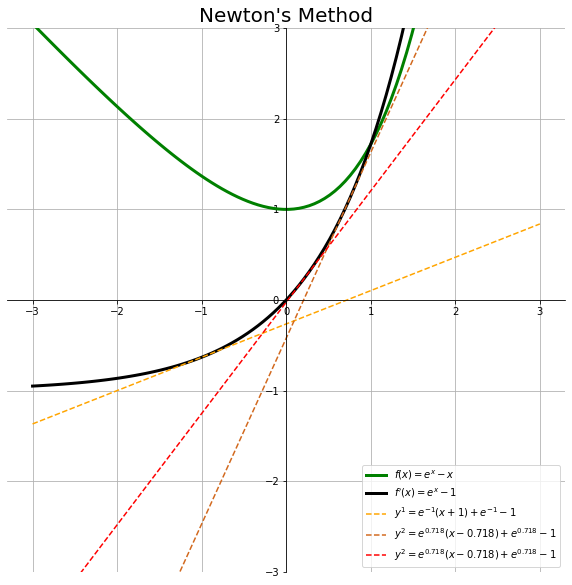

In [174]:
x = np.linspace(-3, 3, 100)

fig_0, ax_0 = plt.subplots(figsize=(10, 10))
fig_0.patch.set_facecolor("xkcd:white")

f = np.exp(x) - x
f_prime = np.exp(x) - 1
x_0, x_1, x_2 = -1, 0.718, 0.206
y_1 = np.exp(x_0) * (x - x_0) + np.exp(x_0) -1
y_2 = np.exp(x_1) * (x - x_1) + np.exp(x_1) -1
y_3 = np.exp(x_2) * (x - x_2) + np.exp(x_2) -1

ax_0.plot(x, f, "-",
          color="green",
          label=r"$f(x)=e^{x}-x$",
          linewidth=3)
ax_0.plot(x, f_prime, "-",
          color="black",
          label=r"$f^{\prime}(x)=e^{x}-1$",
          linewidth=3)
ax_0.plot(x, y_1, "--",
          color="orange",
          label=r"$y^1 = e^{-1}(x+1)+e^{-1}-1$")
ax_0.plot(x, y_2, "--",
          color="chocolate",
          label=r"$y^2 = e^{0.718}(x-0.718)+e^{0.718}-1$")
ax_0.plot(x, y_3, "--",
          color="red",
          label=r"$y^2 = e^{0.718}(x-0.718)+e^{0.718}-1$")

ax_0.set_title("Newton's Method", size=20)
ax_0.set_ylim(-3, 3)

ax_0.spines['top'].set_color('none')
ax_0.spines['bottom'].set_position('zero')
ax_0.spines['left'].set_position('zero')
ax_0.spines['right'].set_color('none')

plt.grid()
plt.legend()
plt.show()

## Q2.1 Solution

By minimizing the objective function we have the following result:

In [194]:
def f(x):
    return (1 - x[0] + x[0] * x[1]) ** 2 \
           + (2 - x[0] + x[0] ** 2 * x[1]) ** 2 \
           + (3 - x[0] + x[0] ** 3 * x[1]) ** 2

result_1 = minimize(f, [0, 0], bounds=[(-5, None), (None, 5)])

In [195]:
md(f"$x^1={round(result_1.x[0], 2)}$")

$x^1=1.52$

In [196]:
md(f"$x^2={round(result_1.x[1], 2)}$")

$x^2=-0.28$

In [178]:
md(f"Minimum Value: $f(x^1, x^2)={round(f(result_1.x), 2)}$")

Minimum Value: $f(x^1, x^2)=0.17$

Graphically we have $f(x^1,x^2)$ and the solution (orange point) as follows:

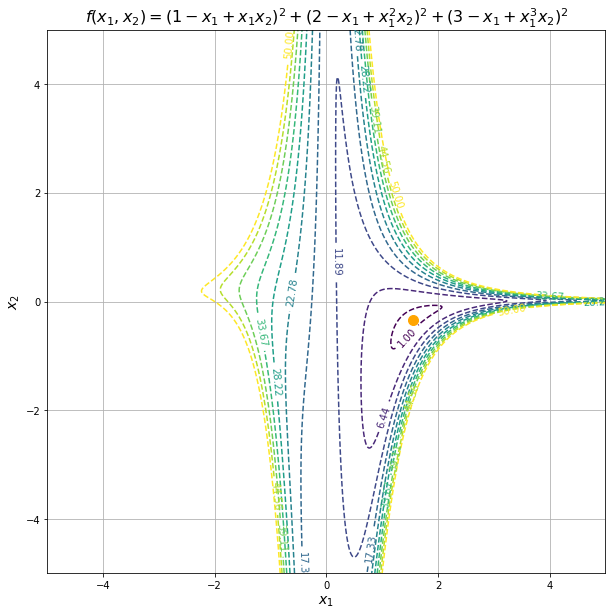

In [179]:
d = np.linspace(-5, 5, 1000)
x1, x2 = np.meshgrid(d, d)

fig_1, ax_1 = plt.subplots(figsize=(10, 10))
fig_1.patch.set_facecolor("xkcd:white")

obj = f([x1, x2])
levels = np.linspace(1, 50, 10)
cp = ax_1.contour(x1, x2, obj, levels, linestyles="dashed")
ax_1.clabel(cp, inline=True, fontsize=10)


ax_1.plot(result_1.x[0], result_1.x[1], "o", markersize=10, color="orange")

ax_1.set_xlabel(r"$x_1$", size=14)
ax_1.set_ylabel(r"$x_2$", size=14)
ax_1.set_xlim(-5,)
ax_1.set_ylim(-5,)
ax_1.set_title(r"$f(x_1,x_2) = (1-x_1+x_1x_2)^2 "
               r"+ (2-x_1+x_1^2x_2)^2 "
               r"+ (3-x_1+x_1^3x_2)^2$",
               size=16)
plt.grid()

Plotting in 3D we have:

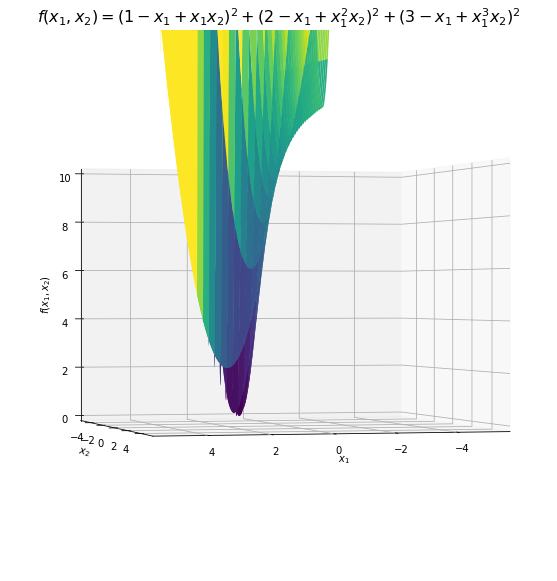

In [180]:
fig_2, ax_2 = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 10))
fig_2.patch.set_facecolor("xkcd:white")

ax_2.plot_surface(x1, x2, obj, cmap="viridis", vmax=20)
ax_2.set_zlim(0, 10)
ax_2.view_init(0, 75)
ax_2.set_xlabel(r"$x_1$")
ax_2.set_ylabel(r"$x_2$")
ax_2.set_zlabel(r"$f(x_1,x_2)$")
ax_2.set_title(r"$f(x_1,x_2) = (1-x_1+x_1x_2)^2 "
               r"+ (2-x_1+x_1^2x_2)^2 "
               r"+ (3-x_1+x_1^3x_2)^2$",
               size=16)
plt.show()

## Q2.2

Solving near the points $x^1=\{0.5, -0.5\}$ and $x^2=\{0.5, -0.5\}$ we have the
following global optimum solutions:

In [181]:
def f2(x):
    return -0.0001 \
           * (np.abs(
        np.sin(x[0]) * np.sin(x[1]) * np.exp(
            np.abs(100 - (np.sqrt(x[0] ** 2 + x[1] ** 2) / np.pi))
        )
    ) + 1) ** 0.1

result_2 = minimize(f2, [0.5, 0.5], method="Nelder-Mead", bounds=[(-10, None), (None, 10)])

result_2_1 = minimize(f2, [-0.5, -0.5], method="Nelder-Mead", bounds=[(-10, None),
                                                                           (None, 10)])

result_2_2 = minimize(f2, [7.5, 7.5], method="Nelder-Mead", bounds=[(-10, None),
                                                                      (None, 10)])

result_2_3 = minimize(f2, [-7.5, -7.5], method="Nelder-Mead", bounds=[(-10, None),
                                                                    (None, 10)])

In [182]:
md(f"Global Solution 1: $x^1={round(result_2.x[0], 2)},\ "
   f"x^2={round(result_2.x[1], 2)}, \ "
   f"f(x^1, x^2)={round(f2(result_2.x), 2)}$")

Global Solution 1: $x^1=1.35,\ x^2=1.35, \ f(x^1, x^2)=-2.06$

In [183]:
md(f"Global Solution 2: $x^1={round(result_2_1.x[0], 2)},\ "
   f"x^2={round(result_2_1.x[1], 2)}, \ "
   f"f(x^1, x^2)={round(f2(result_2_1.x), 2)}$")

Global Solution 2: $x^1=-1.35,\ x^2=-1.35, \ f(x^1, x^2)=-2.06$

Then we have the following Local non-optimum solutions:

In [184]:
md(f"Local Solution 1: $x^1={round(result_2_2.x[0], 2)},\ "
   f"x^2={round(result_2_2.x[1], 2)}, \ "
   f"f(x^1, x^2)={round(f2(result_2_2.x), 2)}$")

Local Solution 1: $x^1=7.63,\ x^2=7.63, \ f(x^1, x^2)=-1.55$

In [185]:
md(f"Local Solution 2: $x^1={round(result_2_3.x[0], 2)},\ "
   f"x^2={round(result_2_3.x[1], 2)}, \ "
   f"f(x^1, x^2)={round(f2(result_2_3.x), 2)}$")

Local Solution 2: $x^1=-7.63,\ x^2=-7.63, \ f(x^1, x^2)=-1.55$

Graphically we have the 2D contour plot and Global Solution (orange points) and Local
Solutions (red triangles)

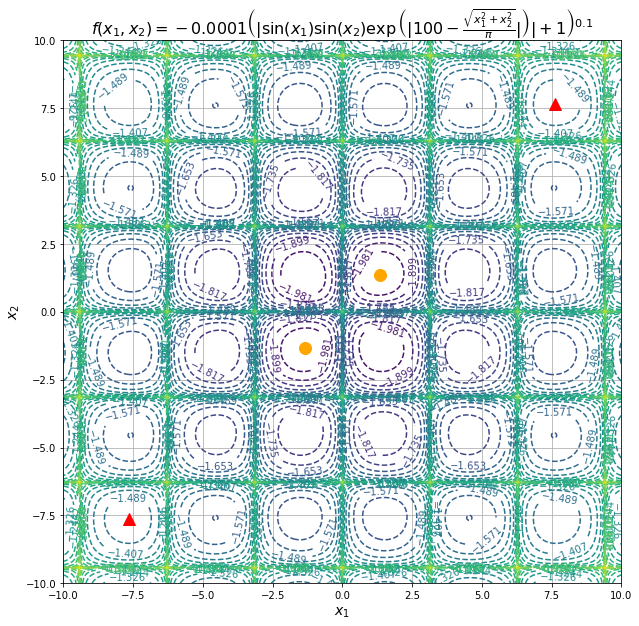

In [186]:
d2 = np.linspace(-10, 10, 1000)
x1, x2 = np.meshgrid(d2, d2)

fig_3, ax_3 = plt.subplots(figsize=(10, 10))
fig_3.patch.set_facecolor("xkcd:white")

obj = f2([x1, x2])
levels = np.linspace(obj.min(), obj.max(), 20)
cp = ax_3.contour(x1, x2, obj, levels, linestyles="dashed")
ax_3.clabel(cp, inline=True, fontsize=10)

opt_global_x = [result_2.x[0], result_2_1.x[0]]
opt_global_y = [result_2.x[1], result_2_1.x[1]]

ax_3.plot(opt_global_x, opt_global_y, "o", markersize=12, color="orange")

opt_nonglobal_x = [result_2_2.x[0], result_2_3.x[0]]
opt_nonglobal_y = [result_2_2.x[1], result_2_3.x[1]]

ax_3.plot(opt_nonglobal_x, opt_nonglobal_y, "^", markersize=12, color="red")


ax_3.set_xlabel(r"$x_1$", size=14)
ax_3.set_ylabel(r"$x_2$", size=14)
ax_3.set_xlim(-10,)
ax_3.set_ylim(-10,)
ax_3.set_title(r"$f(x_1,x_2) = -0.0001\left(\left|\sin(x_1)\sin(x_2)\exp"
               r"\left(\left|100-\frac{\sqrt{x_1^2+x_2^2}}{\pi}\right|\right)"
               r"\right|+1\right)^{0.1}$",
               size=16)

plt.grid()

Also, we have the 3D plot of the function to minimize:

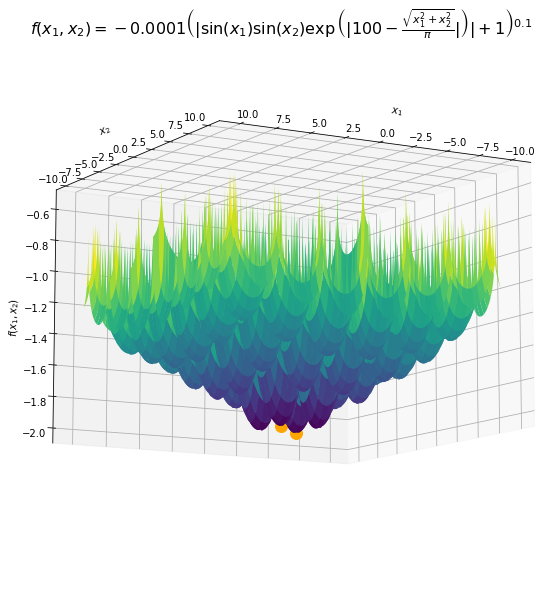

In [187]:
fig_4, ax_4 = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 10))
fig_4.patch.set_facecolor("xkcd:white")

ax_4.plot_surface(x1, x2, obj, cmap="viridis")
ax_4.set_zlim(obj.min(), obj.max())
ax_4.view_init(-10, 60)
ax_4.set_xlabel(r"$x_1$")
ax_4.set_ylabel(r"$x_2$")
ax_4.set_zlabel(r"$f(x_1,x_2)$")
ax_4.set_title(r"$f(x_1,x_2) = -0.0001\left(\left|\sin(x_1)\sin(x_2)\exp"
               r"\left(\left|100-\frac{\sqrt{x_1^2+x_2^2}}{\pi}\right|\right)"
               r"\right|+1\right)^{0.1}$",
               size=16)

opt_global_z = [f2(result_2.x), f2(result_2_1.x)]
opt_nonglobal_z = [f2(result_2_2.x), f2(result_2_3.x)]
ax_4.plot(opt_global_x, opt_global_y, opt_global_z, "o", markersize=12, color="orange")
ax_4.plot(opt_nonglobal_x, opt_nonglobal_y, opt_nonglobal_z, "o", markersize=12, color="red")

plt.show()

